In [147]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dot,sum,log
from numpy.linalg import inv
import scipy.optimize as opt


# #Build a logistic regression model to predict whether a student gets admitted into a university

In [148]:

class LogisticRegression:
    def __init__(self,name):
      self.file = name
    
    def sigmoid(self,z):
        z=1.0/(1+np.exp(-z))
        return z
       #Debugging this over 1 week!!! 
       #First 3 lines 
    def cf(self,theta,X,y):
         theta=np.array(theta).reshape(3,1)
         X=np.array(X).reshape(100,3)
         y=np.array(y).reshape(100,1)
         m=len(y)
         h=self.sigmoid(np.dot(X,theta))
         A=-(y * log(h))
         B=-(1-y)* log(1-h)
         J=sum(A+B)/m
         return J
   
    #returnd a ValueError: tnc: invalid gradient vector from minimized function.
    #   #Debugging this over 1 week!!! 
      
    def gd(self,theta,X,y):
         m=len(y)
         X1=X.reshape(self.m,self.n+1)   
         grad=np.zeros((3,1))     
         theta1=np.array(theta).reshape(3,1)   
         h1=self.sigmoid(np.dot(X1,theta1)).reshape(m,1)
         grad=   (np.dot(X1.T,h1-y))/m 
         return grad
        
    def fp(self,X,y,theta):
          print("\nX=",X.shape)
          print("\ntheta=",theta.shape)
          print("\ny=",y.shape)
            
    def addOnes(self):
      n = self.X.shape[0]
      ones = np.ones(n).reshape(n,1)
      self.X=np.concatenate((ones,self.X),1).reshape(n,3)   
     
    def load(self):
        self.data = pd.read_csv(self.file,header=None,
                                names = ["score1", "score2","outcome"])
        #Not creating X properly was a source of errors.Took a long time 
        #to debug
        self.X=np.array([self.data['score1'],self.data['score2']], dtype=np.float64)
        self.X=np.transpose(self.X)
        (self.m,self.n)=self.X.shape
        self.theta=np.zeros((self.n+1,1))
        self.y = np.array([self.data['outcome']], dtype=np.float64).reshape(self.m,1) 
    
    def plotData(self):
        positive = self.data[self.data['outcome']==1]
        negative = self.data[self.data['outcome']==0]
        #self.positive
        plt.scatter(positive["score1"],positive["score2"], marker='o', color='b')
        plt.scatter(negative["score1"],negative["score2"], marker='x', color='r')
        plt.xlabel("Exam 1 score")
        plt.ylabel("Exam 2 score")
        plt.legend(loc='upper left')
    def fminc(self):
         return opt.fmin_tnc(func=self.cf, x0=self.theta, fprime=self.gd, args=(self.X.reshape(100,3), self.y.reshape(100,1))) 
       

# Visualizing the data

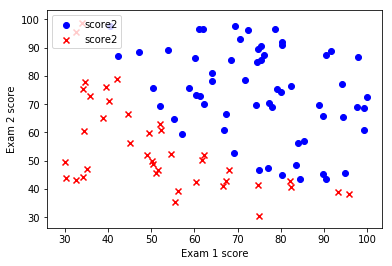

In [149]:
lr = LogisticRegression("ex2data1.txt")
lr.load()
lr.plotData()

In [150]:
lr.addOnes()
result=lr.fminc()
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)